## MICROPROJECT: LOGISTIC REGRESSION

A machine learning “micro” (non-comprehensive) project attempting to predict the salary class of people in the dataset.

Meant to showcase general understanding of applied ML in R.

### Setup


In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Reading the data

In [2]:
adult <- read.csv("adult_sal.csv")

head(adult)

,X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Removing repeated index:

In [3]:
adult <- select(adult, -X)

Checking out the structure of the variables and their summary.

In [4]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "State-gov" "Self-emp-not-inc" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married-civ-spouse" "Divorced" "Married-civ-spouse" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : chr  "United-States" "United-States" "U

In [5]:
# Convert all character columns to factors
adult <- adult %>%
  mutate_if(is.character, ~ factor(trimws(.)))

# Check the structure of the dataset to confirm
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

In [6]:
summary(adult)

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

### Data Cleaning
We have a lot of categorical variables, with too many factors that may be necessary for model building. In this section, we’ll collapse factors for these columns into fewer categories.

#### Type Employer

Let’s check out the frequency of the different factor levels in this column.

In [7]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

We’ll combine similar looking factor levels into single levels.

In [8]:
levels(adult$type_employer)[4] <- "Unemployed"
levels(adult$type_employer)[9] <- "Unemployed"
levels(adult$type_employer)[3] <- "SL-gov"
levels(adult$type_employer)[8] <- "SL-gov"
levels(adult$type_employer)[6:7] <- "self-emp"

In [9]:
table(adult$type_employer)


          ? Federal-gov      SL-gov  Unemployed     Private    self-emp 
       1836         960        3391          21       22696        3657 

#### Marital Status

We’ll do the same for this column.

In [10]:
levels(adult$marital)[1] <- "Not-Married"
levels(adult$marital)[6:7] <- "Not-Married"
levels(adult$marital)[2:4] <- "Married"

table(adult$marital)


  Not-Married       Married Never-married 
         6461         15417         10683 

#### Countries into region

Again, we have too many countries to deal with. It makes sense to convert them into regions. Let’s build vectors for regions.

In [11]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
          'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                            'Jamaica','Trinadad&Tobago')
Other <- c('South')

Function to collapse into continents

In [12]:
group_country <- function(ctry){
    if (ctry %in% Asia){
        return('Asia')
    }else if (ctry %in% North.America){
        return('North.America')
    }else if (ctry %in% Europe){
        return('Europe')
    }else if (ctry %in% Latin.and.South.America){
        return('Latin.and.South.America')
    }else{
        return('Other')      
    }
}

Applying the function:

In [13]:
adult$country <- sapply(adult$country,group_country)
colnames(adult)[14] <- "region"
table(adult$region)


                   Asia                  Europe Latin.and.South.America 
                    671                     521                    1301 
          North.America                   Other 
                  29405                     663 

### Missing Data

In [14]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.2, built: 2024-04-10)
## Copyright (C) 2005-2024 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [15]:
adult[adult == "?"] <- NA

Refactoring the columns:

In [16]:
adult$type_employer <- factor(adult$type_employer)
adult$region <- factor(adult$region)
adult$marital <- factor(adult$marital)
adult$occupation <- factor(adult$occupation)

Creating a missing map for the data:

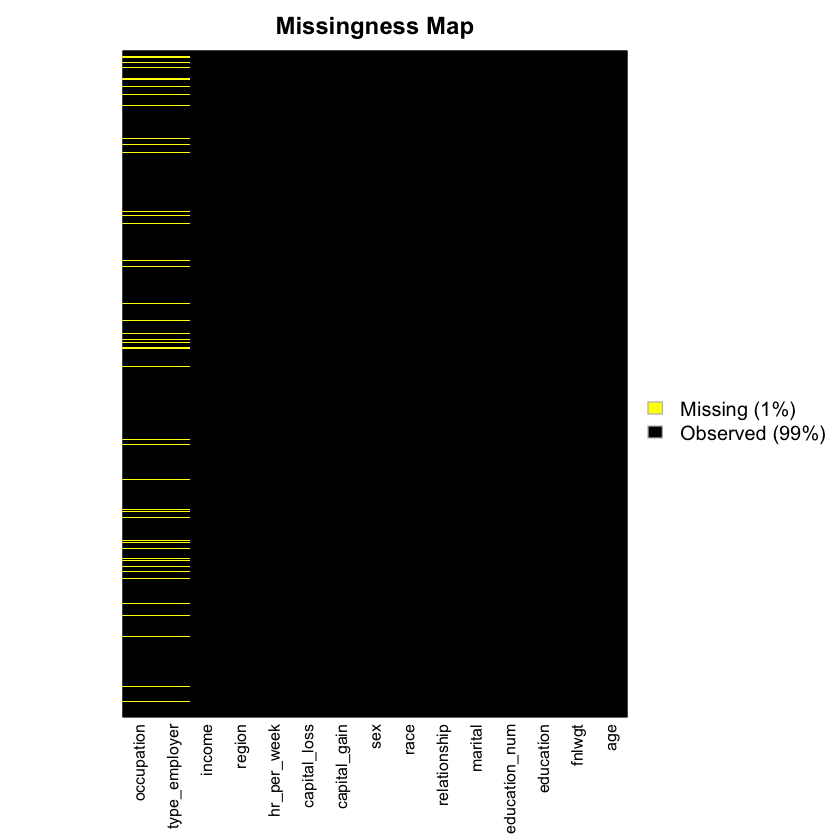

In [17]:
missmap(adult, y.at=c(1),y.labels = c(" "),col=c("yellow","black"))

Ommiting missing values:

In [18]:
adult <- na.omit(adult)

Checking the missing map again:

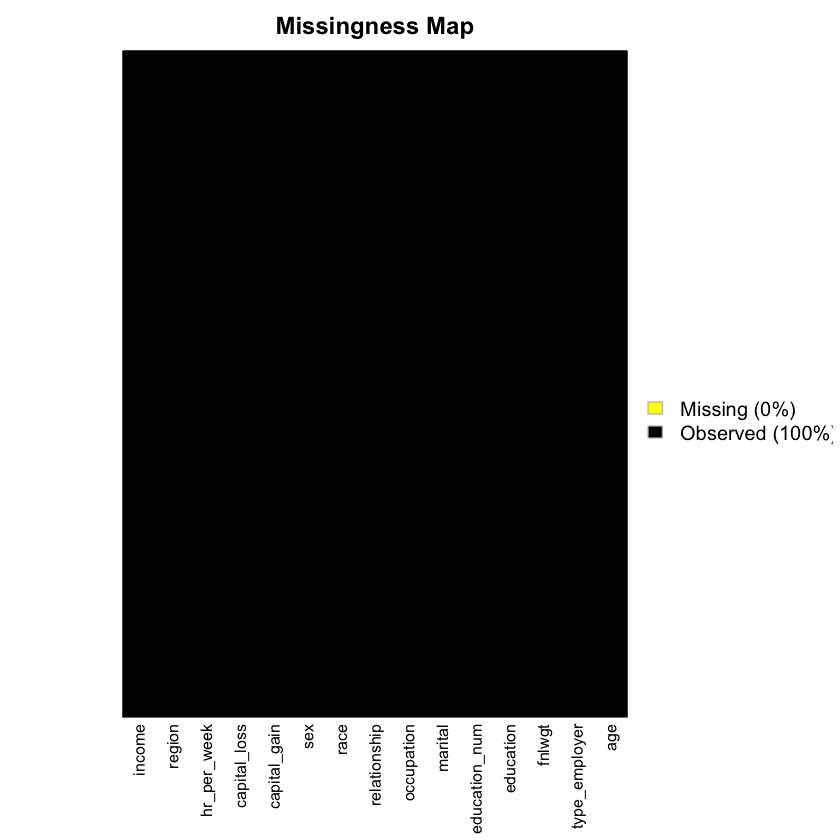

In [19]:
missmap(adult, y.at=c(1),y.labels = c(" "),col=c("yellow","black"))

### Exploratory Data Analysis
Histogram of ages, by income:

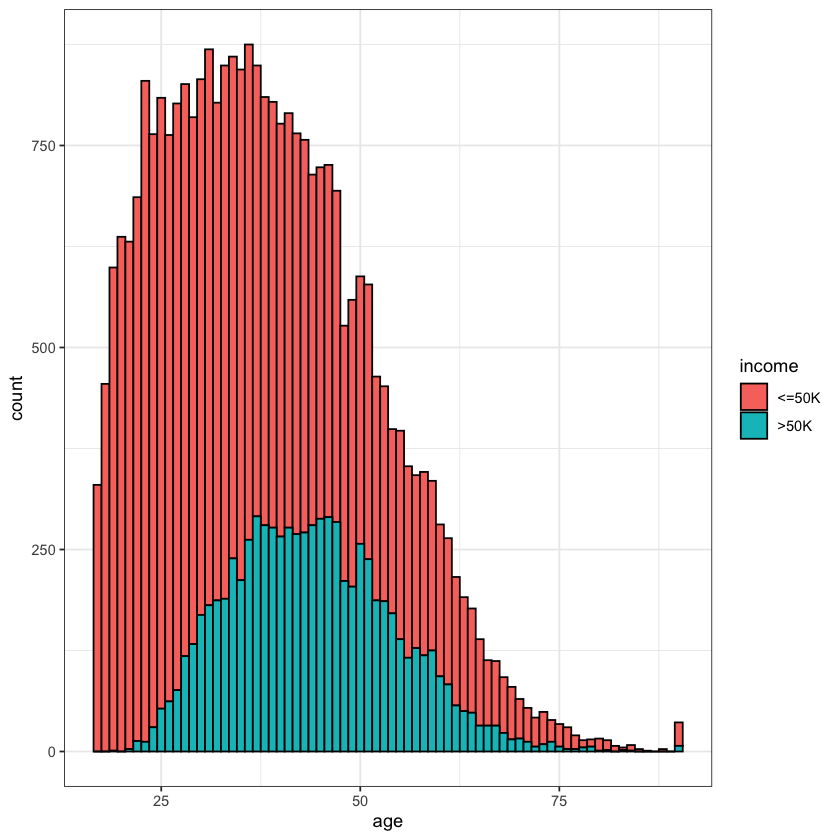

In [20]:
ggplot(adult,aes(age)) + geom_histogram(aes(fill=income),color='black',binwidth=1) + theme_bw()

Histogram of hours worked per week:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


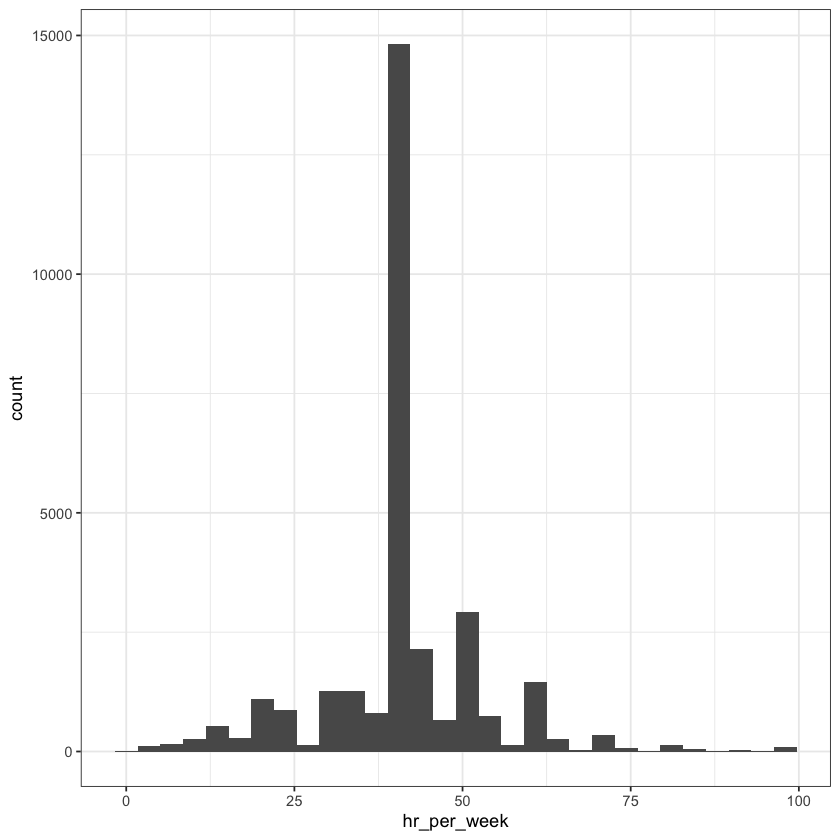

In [21]:
ggplot(adult,aes(hr_per_week)) + geom_histogram() + theme_bw()

Barplot of region filled by income class:

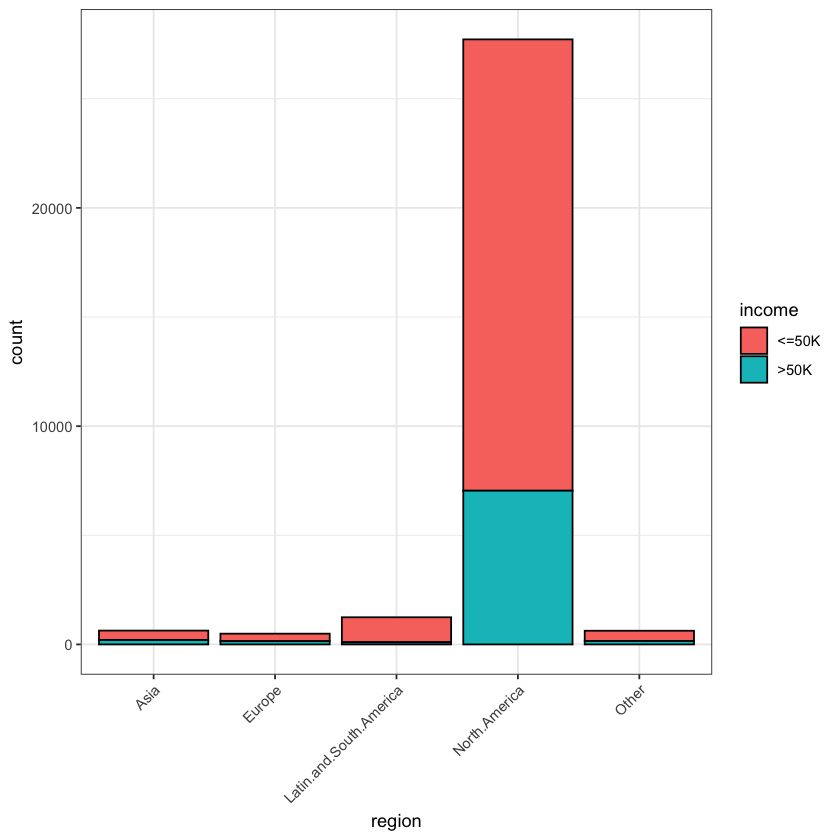

In [22]:
ggplot(adult,aes(region)) + geom_bar(aes(fill=income),color="black") + theme_bw() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Model Building

Now, we’ll build a model to classify people into two groups: above or below 50k in Salary. It makes sense to use logistic regression here as we’re trying to predict a binary outcome.

Train-test split:

In [23]:
library(caTools)

#Splitting the data into 70% training and 30% test
sample <- sample.split(adult$income,SplitRatio = 0.7)

train = subset(adult,sample==TRUE)

test = subset(adult, sample==FALSE) 

Creating the model:

In [24]:
model = glm(income ~ ., family = binomial(logit), data = train)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [25]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(logit), data = train)

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -5.831e+00  4.803e-01 -12.139  < 2e-16 ***
age                            2.439e-02  1.990e-03  12.257  < 2e-16 ***
type_employerSL-gov           -7.961e-01  1.238e-01  -6.432 1.26e-10 ***
type_employerUnemployed       -1.424e+01  3.572e+02  -0.040 0.968195    
type_employerPrivate          -5.881e-01  1.100e-01  -5.348 8.92e-08 ***
type_employerself-emp         -8.370e-01  1.226e-01  -6.830 8.49e-12 ***
fnlwgt                         5.762e-07  2.065e-07   2.790 0.005267 ** 
education11th                  1.669e-01  2.488e-01   0.671 0.502373    
education12th                  3.521e-01  3.250e-01   1.083 0.278641    
education1st-4th              -1.414e+00  8.489e-01  -1.666 0.095807 .  
education5th-6th               1.275e-02  3.663e-01   0.035 0.972241

Removing unimportant features iteratively using step :

In [26]:
new.step.model <- step(model)

Start:  AIC=14152.27
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=14152.27
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                Df Deviance   AIC
<none>                14044 14152
- race           4    14054 14154
- fnlwgt         1    14052 14158
- region         4    14064 14164
- marital        2    14090 14194
- type_employer  4    14105 14205
- sex            1    14131 14237
- age            1    14196 14302
- hr_per_week    1    14254 14360
- capital_loss   1    14268 14374
- relationship   5    14319 14417
- occupation    13    14448 14530
- education     15    14773 14851
- capital_gain   1    15368 15474


Predictions and checking results, we’ll use the new step model for this:

In [27]:
test$predicted.income = predict(new.step.model, newdata=test, type="response")

table(test$income, test$predicted.income > 0.5)

       
        FALSE TRUE
  <=50K  6443  477
  >50K    941 1354